## 라이브러리

In [36]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import xgboost as xgb

## EDA

In [94]:
path = '/content/drive/MyDrive/Data/'
penguins = pd.read_csv(path + 'penguins.csv',encoding='utf-8')
penguins.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181,3750,MALE,NaN,NaN
1,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454
2,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,40.3,18.0,195,3250,FEMALE,8.36821,-25.33302
3,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.7,19.3,193,3450,FEMALE,8.76651,-25.32426
4,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.3,20.6,190,3650,MALE,8.66496,-25.29805


In [95]:
penguins = penguins.dropna()

In [96]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(penguins, random_state=42)

In [97]:
print(train.shape)
print(test.shape)

(243, 11)
(82, 11)


## 속성 확인

In [98]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 233 to 114
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   243 non-null    int64  
 1   Species              243 non-null    object 
 2   Island               243 non-null    object 
 3   Clutch Completion    243 non-null    object 
 4   Culmen Length (mm)   243 non-null    float64
 5   Culmen Depth (mm)    243 non-null    float64
 6   Flipper Length (mm)  243 non-null    int64  
 7   Body Mass (g)        243 non-null    int64  
 8   Sex                  243 non-null    object 
 9   Delta 15 N (o/oo)    243 non-null    float64
 10  Delta 13 C (o/oo)    243 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 22.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 248 to 41
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------              

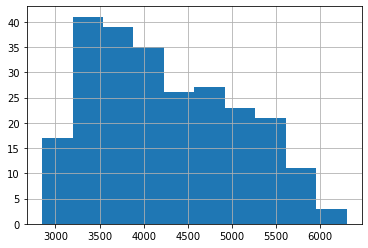

In [99]:
train['Body Mass (g)'].hist()

In [100]:
individual = ['Species', 'Island', 'Clutch Completion', 'Sex']

In [101]:
features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

In [102]:
pngn = penguins[features]
pngn.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo)
1,39.5,17.4,186,8.94956,-24.69454
2,40.3,18.0,195,8.36821,-25.33302
3,36.7,19.3,193,8.76651,-25.32426
4,39.3,20.6,190,8.66496,-25.29805
5,38.9,17.8,181,9.18718,-25.21799


In [103]:
pngn.corr()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo)
Culmen Length (mm),1.000000,-0.222922,0.647947,-0.057119,0.188244
Culmen Depth (mm),-0.222922,1.000000,-0.575852,0.600344,0.420819
Flipper Length (mm),0.647947,-0.575852,1.000000,-0.503779,-0.376786
Delta 15 N (o/oo),-0.057119,0.600344,-0.503779,1.000000,0.570088
Delta 13 C (o/oo),0.188244,0.420819,-0.376786,0.570088,1.000000


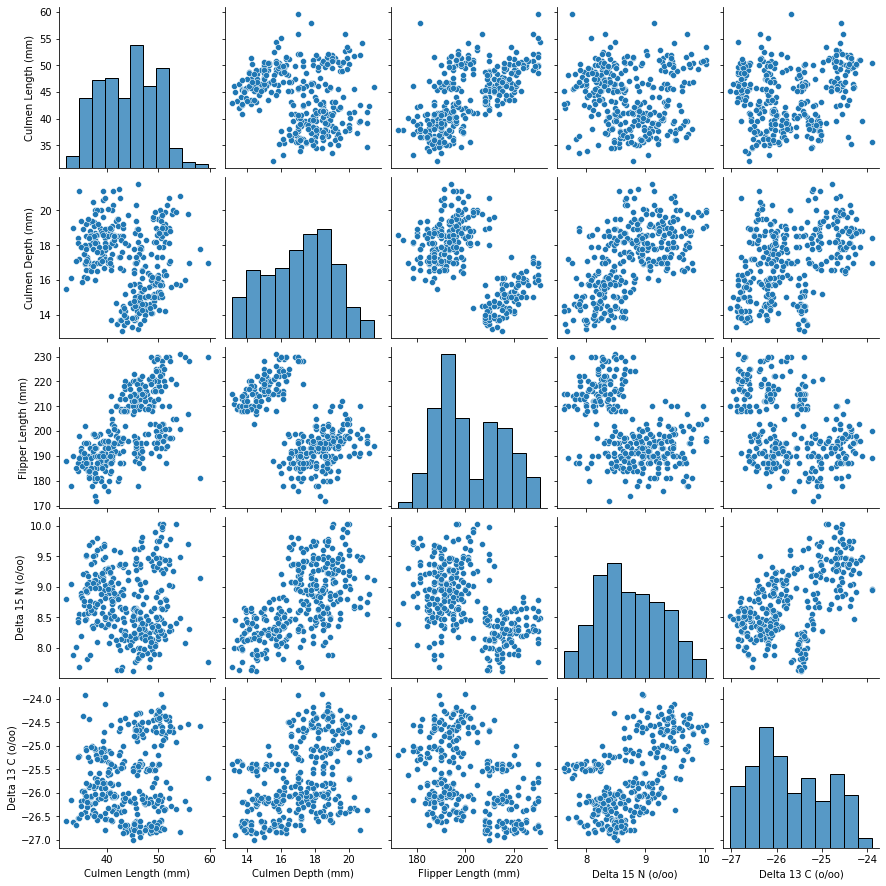

In [104]:
pngn = pngn.dropna(axis=0)
pngn.corr()

sns.pairplot(pngn)

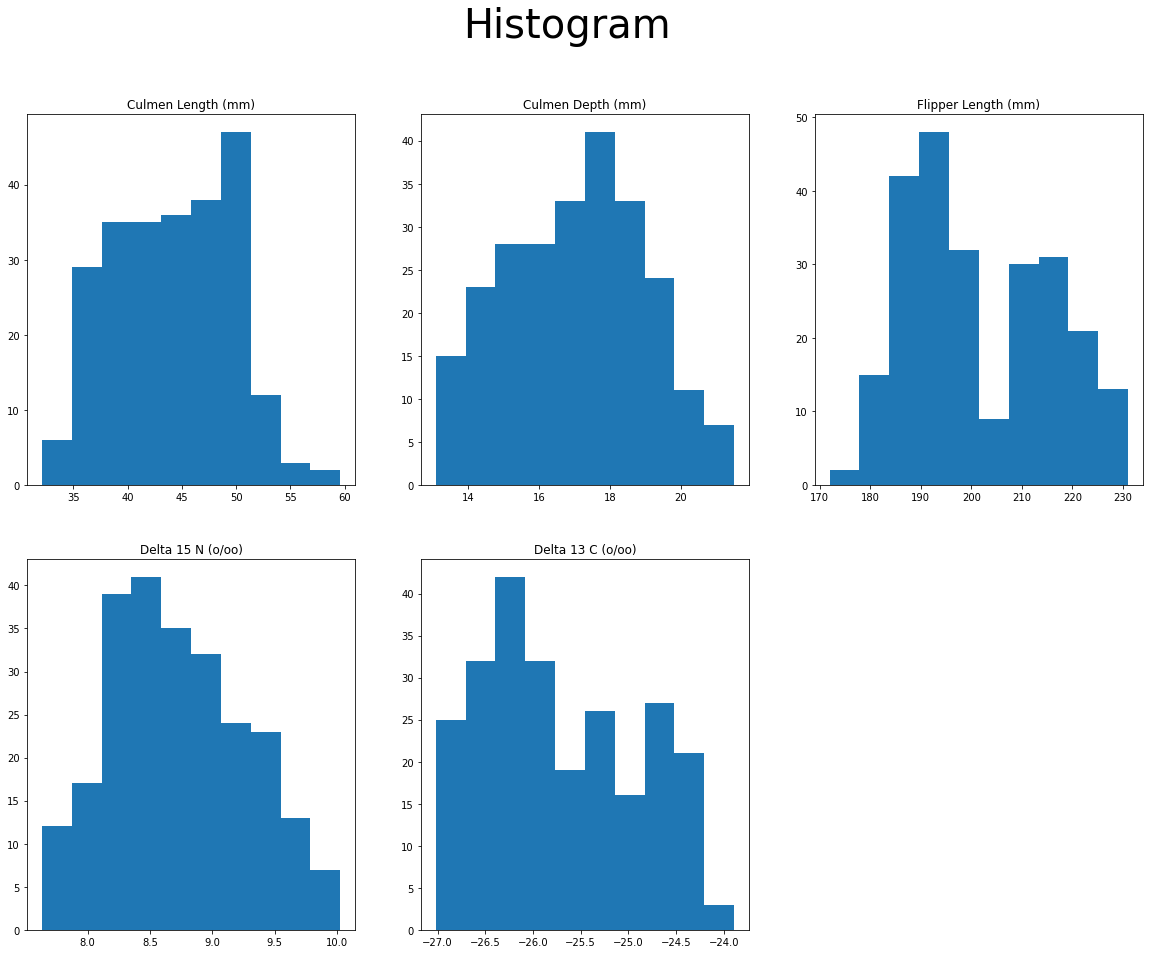

In [105]:
plt.figure(figsize=(20,15))
plt.suptitle("Histogram", fontsize=40)

for i in range(len(features)):
    plt.subplot(2,3,i+1)
    plt.title(features[i])
    plt.hist(train[features[i]])

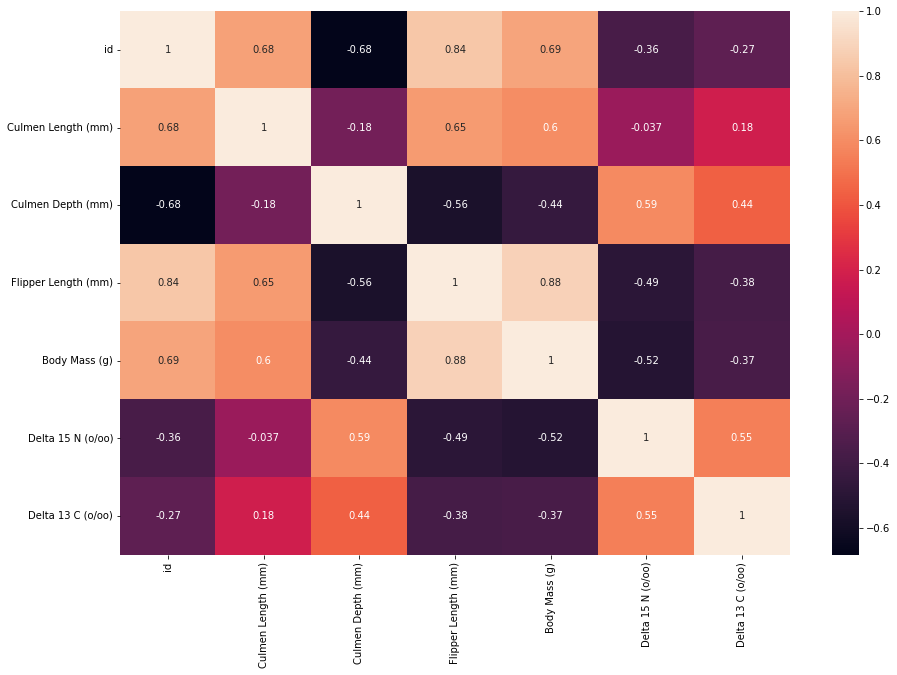

In [106]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(train.drop(individual, axis = 1).corr(), annot=True)
plt.show()

## 이산형 변수 관찰

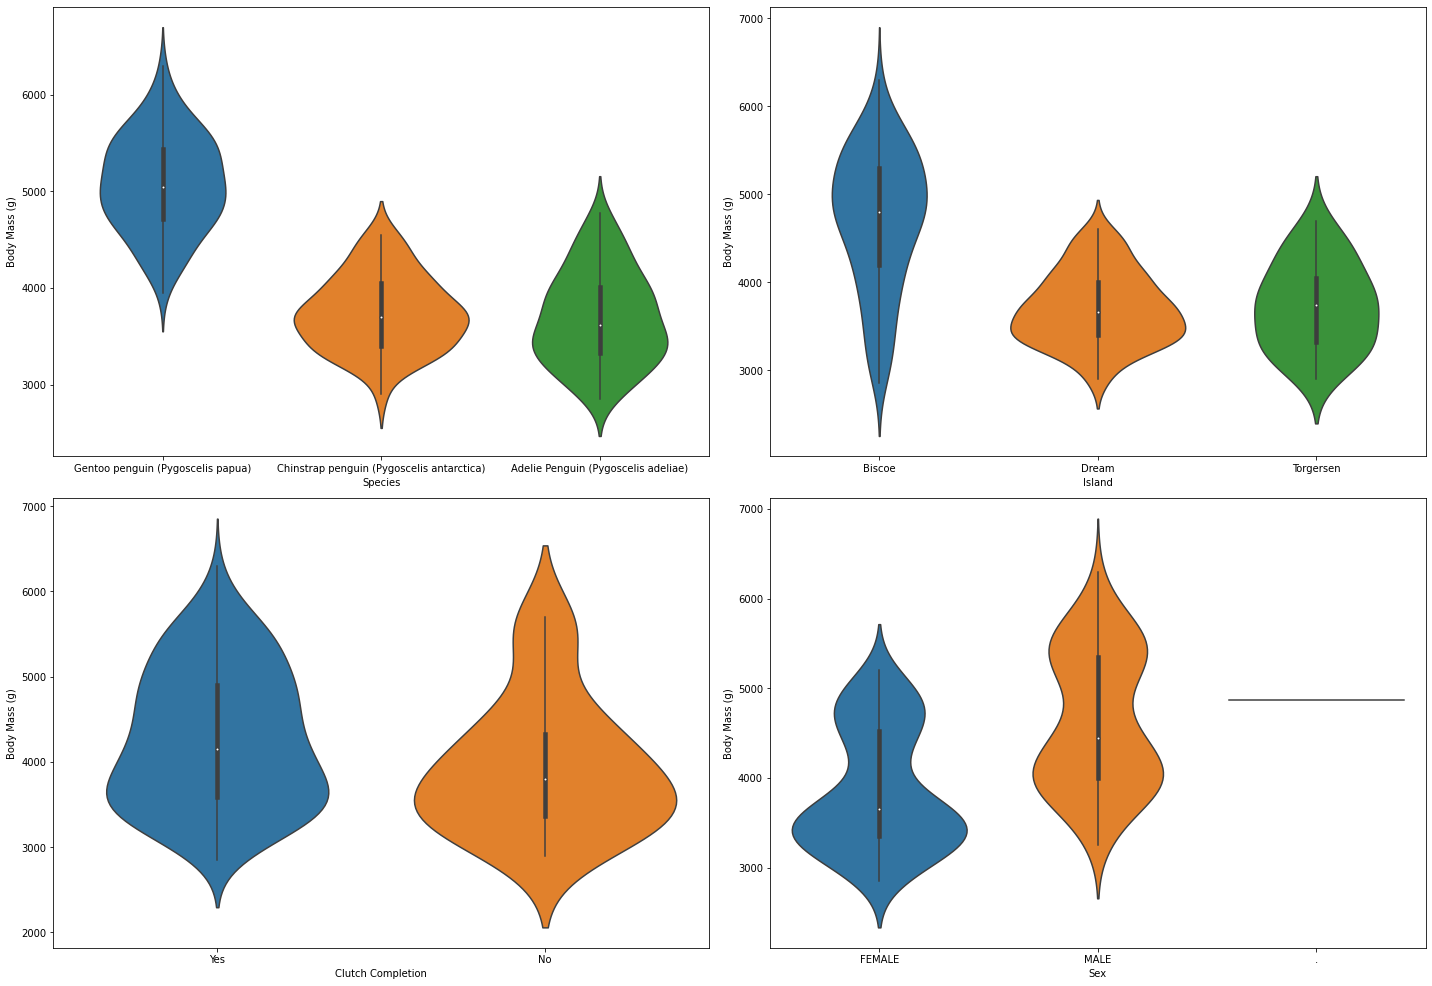

In [107]:
plt.figure(figsize=(20,15))

for i in range(len(individual)):
    plt.subplot(2,2,i+1)
    plt.xlabel(individual[i])
    plt.ylabel('Body Mass (g)')
    sns.violinplot(x= train[individual[i]], y= train['Body Mass (g)'])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

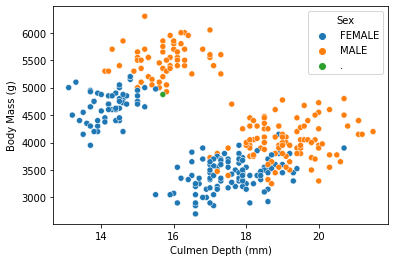

In [109]:
sns.scatterplot(x='Culmen Depth (mm)',y='Body Mass (g)',hue='Sex',data=penguins)

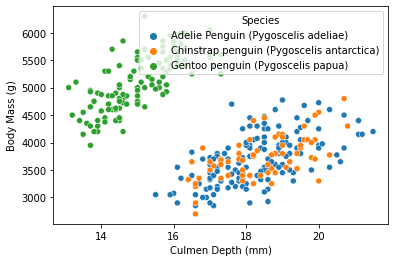

In [114]:
sns.scatterplot(x='Culmen Depth (mm)',y='Body Mass (g)',hue='Species',data=penguins)

Culmen Length (mm)
 1.166192    4
 0.194378    4
 0.249386    4
-1.107486    3
-0.850780    3
            ..
-0.649083    1
 1.477906    1
-0.484058    1
-1.162494    1
-1.419200    1
Name: Culmen Length (mm), Length: 114, dtype: int64


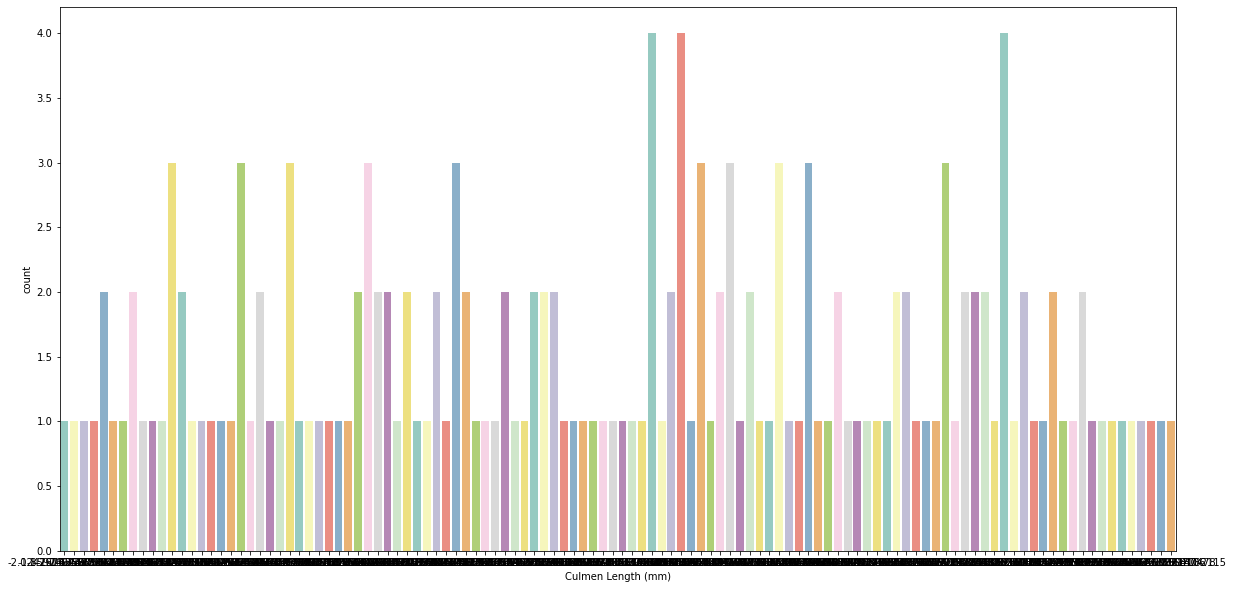

Culmen Depth (mm)
-0.015643    8
 0.446670    6
 0.395302    6
 0.138461    6
-1.043005    6
            ..
 1.936345    1
-1.967631    1
 1.884976    1
-1.094373    1
 0.498038    1
Name: Culmen Depth (mm), Length: 69, dtype: int64


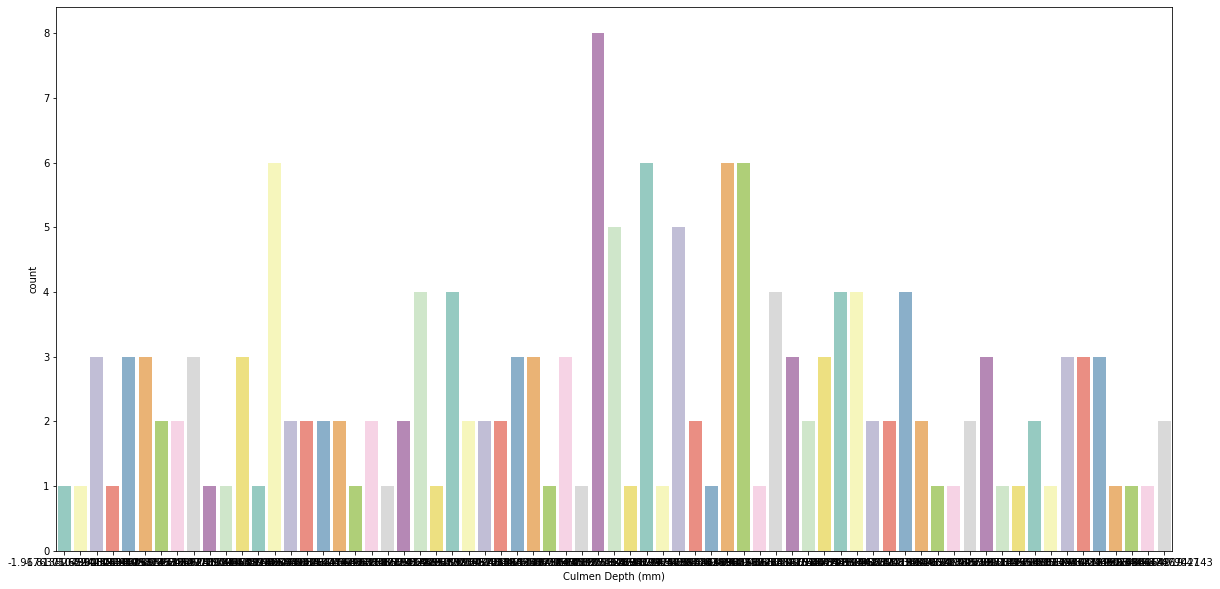

Flipper Length (mm)
-0.793416    12
-1.001025    10
-0.447400     8
-0.585806     7
-0.724213     6
-1.139432     6
 1.974711     6
 0.590648     5
 0.936663     5
-0.378197     5
-0.170587     4
 0.521444     4
-0.862619     4
-1.416244     4
-0.032181     4
 1.351882     4
-0.655009     4
-1.208635     4
-0.931822     4
 1.005867     4
 1.559492     3
 0.106225     3
 1.075070     3
-0.308994     3
-1.070228     3
 0.867460     3
 0.452241     3
-1.623854     3
 1.282679     3
-0.239790     3
 1.144273     3
 1.628695     3
-0.101384     2
 1.490289     2
 1.213476     2
-0.516603     2
-1.485447     2
 1.421086     2
 0.659851     2
 0.244632     2
 0.729054     2
-1.900666     1
 1.836305     1
 0.798257     1
 1.905508     1
 0.037022     1
Name: Flipper Length (mm), dtype: int64


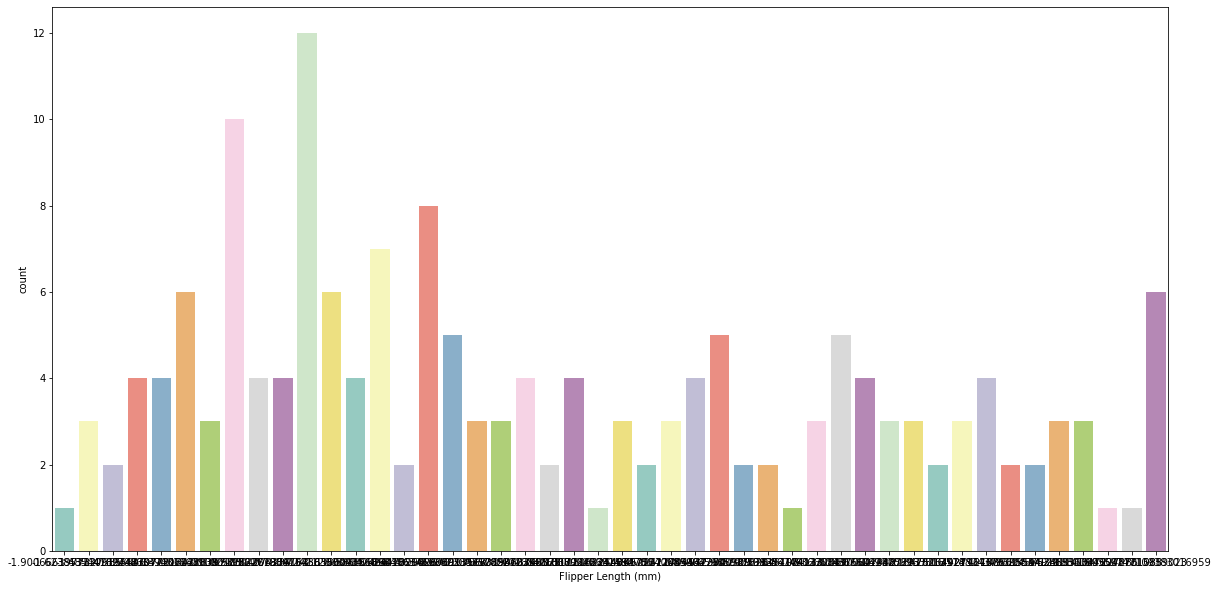

Delta 15 N (o/oo)
 0.223275    1
 0.992936    1
 0.246002    1
-0.169733    1
-0.901753    1
            ..
 0.660462    1
 0.115940    1
 0.047558    1
-1.604982    1
-0.174231    1
Name: Delta 15 N (o/oo), Length: 169, dtype: int64


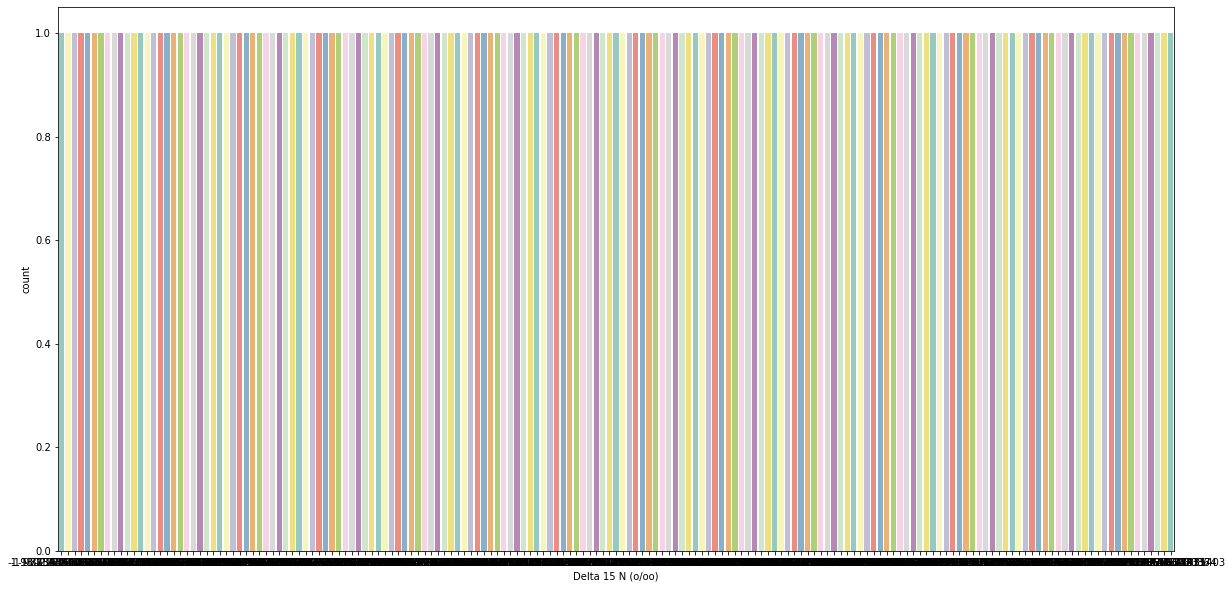

Delta 13 C (o/oo)
-0.721577    1
 1.734875    1
-0.122351    1
-1.127710    1
 0.346639    1
            ..
 1.446941    1
-0.071492    1
-0.843734    1
 0.407517    1
-0.516124    1
Name: Delta 13 C (o/oo), Length: 169, dtype: int64


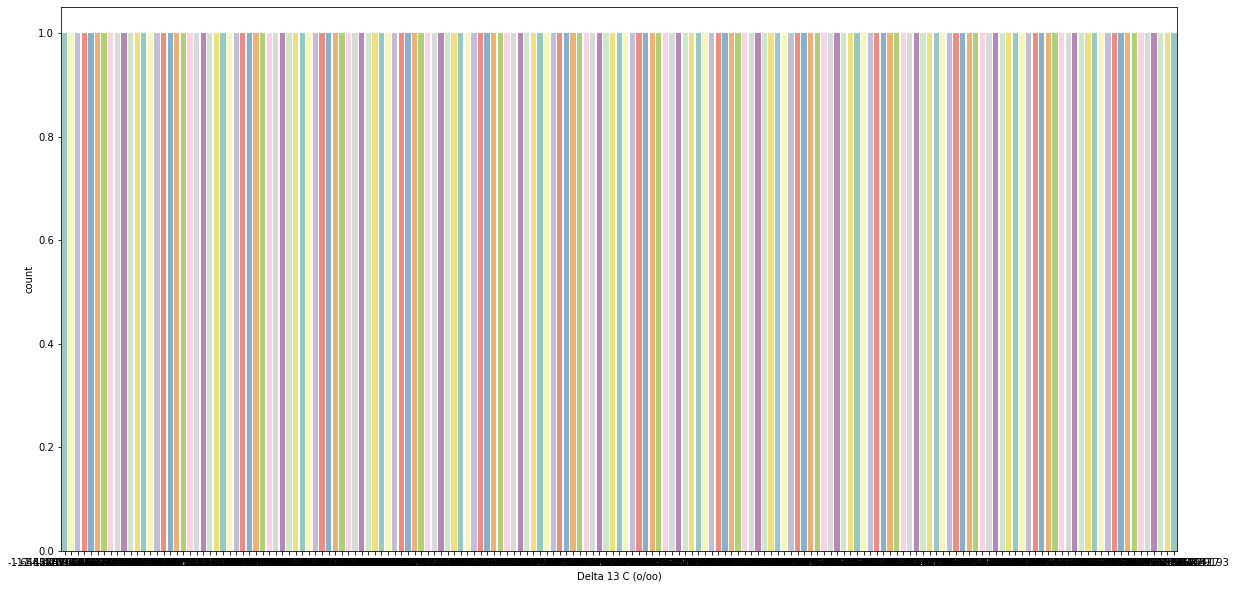

In [121]:
for _ in features:
    print(_)
    print(train[_].value_counts())
    plt.figure(figsize=(20,10))
    sns.countplot(x=train[_],palette='Set3')
    plt.show()

Culmen Length (mm)


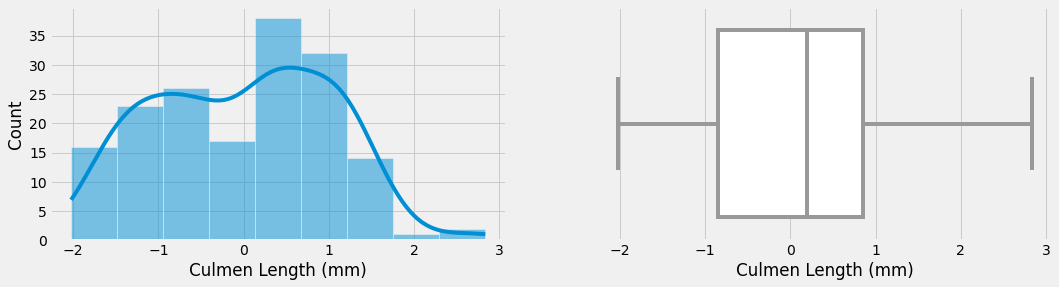

<Figure size 1080x360 with 0 Axes>

Culmen Depth (mm)


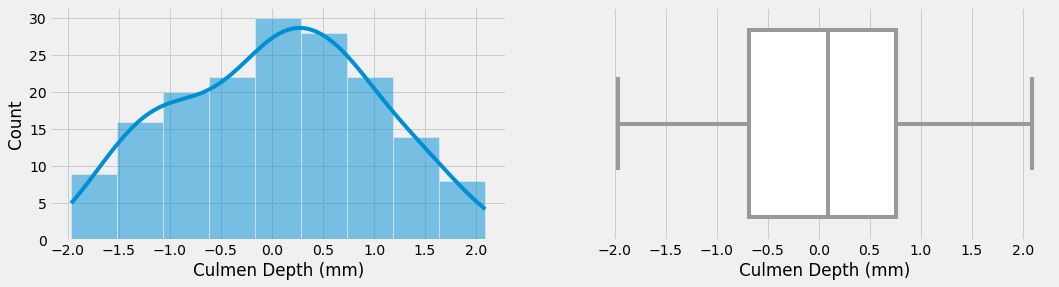

<Figure size 1080x360 with 0 Axes>

Flipper Length (mm)


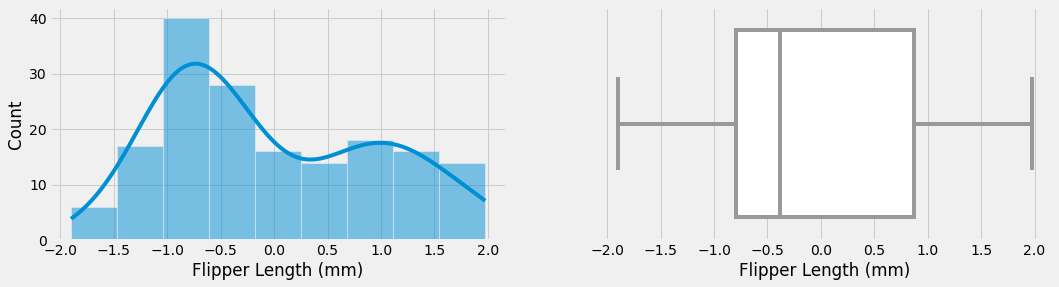

<Figure size 1080x360 with 0 Axes>

Delta 15 N (o/oo)


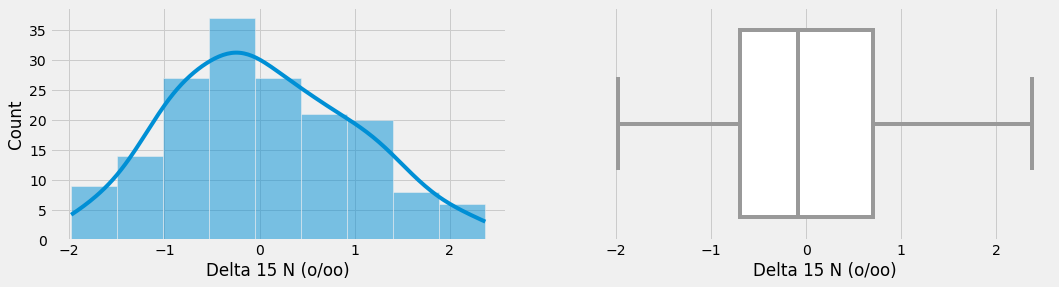

<Figure size 1080x360 with 0 Axes>

Delta 13 C (o/oo)


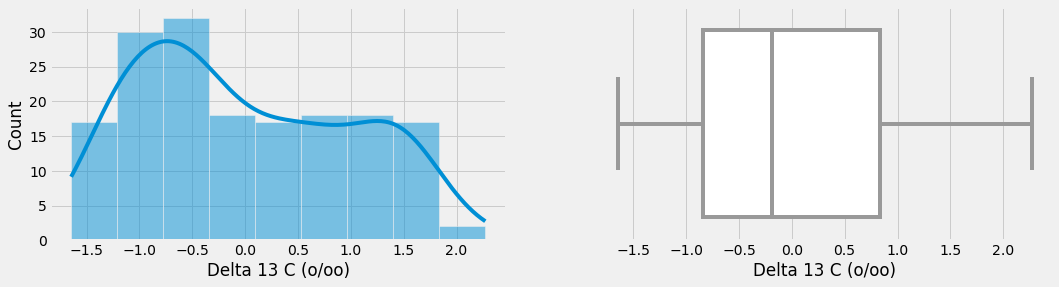

<Figure size 1080x360 with 0 Axes>

In [123]:
plt.style.use('fivethirtyeight')
for _ in features:
    print(_)
    f,ax=plt.subplots(1,2,figsize=(16,4))
    plt.figure(figsize=(15,5))
    sns.histplot(x=train[_],ax=ax[0],kde=True)
    sns.boxplot(x=train[_],ax=ax[1],color='white')
    plt.show()

## 전처리

In [110]:
train.fillna(train.mean(), inplace = True)
test.fillna(train.mean(), inplace = True)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(train.shape)
print(test.shape)

(243, 18)
(82, 17)


In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_scaler = scaler.fit_transform(train[features])
train[features] = pd.DataFrame(data=train_scaler, columns=features)

test_scaler = scaler.transform(test[features])
test[features] = pd.DataFrame(data=test_scaler, columns=features)

train[features].head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo)
233,-1.675905,0.446670,-0.655009,0.223275,-0.721577
160,-0.484058,0.754878,-0.032181,0.317770,-0.457475
170,-1.272511,1.217191,-1.208635,-0.667435,-0.931124
237,-0.667419,0.960351,-1.485447,0.324818,0.736767
331,NaN,NaN,NaN,NaN,NaN


In [112]:
train_label = train['Body Mass (g)']
train.drop(['Body Mass (g)'], axis = 1, inplace = True)

## 모델 확인

In [113]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, train, train_label, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print('alpha 값 ', alpha, '일때 평균 rmse :', np.round(avg_rmse,4))

alpha 값  0 일때 평균 rmse : nan
alpha 값  0.1 일때 평균 rmse : nan
alpha 값  1 일때 평균 rmse : nan
alpha 값  10 일때 평균 rmse : nan
alpha 값  100 일때 평균 rmse : nan
